## 6.4 Machine Learning Part I

### 1. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = 'C:/Users/samco/OneDrive/Achievement 6 Career Foundry/world-happiness'

In [9]:
df = pd.read_csv(os.path.join(path, 'World Happiness 2015-2024 Combined.csv')) 

### 2. Data Cleaning

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness_Score', 'Gdp_Per_Capita',
       'Social_Support', 'Healthy_Life_Expectancy',
       'Freedom_to_Make_Life_Choices', 'Generosity',
       'Perceptions_of_Corruption', 'Year'],
      dtype='object')

In [14]:
df.head(20)

,Country,Region,Happiness_Score,Gdp_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Make_Life_Choices,Generosity,Perceptions_of_Corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2015
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,2015
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,2015
8,New Zealand,ANZ,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2015
9,Australia,ANZ,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,2015


In [16]:
df.shape

(1510, 10)

##### Missing values check

In [28]:
# Check for missing values
df.isnull().sum()

# No missing values for Happiness Scores and only 3 for GDP per capita.

Country                         0
Region                          0
Happiness_Score                 0
Gdp_Per_Capita                  3
Social_Support                  3
Healthy_Life_Expectancy         4
Freedom_to_Make_Life_Choices    3
Generosity                      3
Perceptions_of_Corruption       4
Year                            0
dtype: int64

In [90]:
# Drop missing values
df.dropna(inplace=True) # Removes all rows with NaN values

In [94]:
df.isnull().sum() # Checking that all missing values were dropped

Country                         0
Region                          0
Happiness_Score                 0
Gdp_Per_Capita                  0
Social_Support                  0
Healthy_Life_Expectancy         0
Freedom_to_Make_Life_Choices    0
Generosity                      0
Perceptions_of_Corruption       0
Year                            0
dtype: int64

##### Duplicates check

In [98]:
dups = df.duplicated()

In [100]:
dups.shape # No dups

(1505,)

##### Extreme values check

In [103]:
sns.distplot(df['Gdp_Per_Capita'], bins=25) # Shows extreme values

C:\Users\samco\AppData\Local\Temp\ipykernel_25820\2985922353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gdp_Per_Capita'], bins=25) # Shows extreme values


<Axes: xlabel='Gdp_Per_Capita', ylabel='Density'>

In [105]:
sns.displot(df["Gdp_Per_Capita"])
# Not sure what to do about this

In [107]:
df['Gdp_Per_Capita'].mean() # Check the mean

1.0520552261362124

In [109]:
df['Gdp_Per_Capita'].median() # Check the median

1.07

In [111]:
df['Gdp_Per_Capita'].max() # Check the max

2.209

#### Hypothesis: As the independent variable GDP per capita increases, the dependent variable, Happiness Score, also increases. The two variables will exhibit a positive correlation.


### 3. Data Prep for Regression Analysis

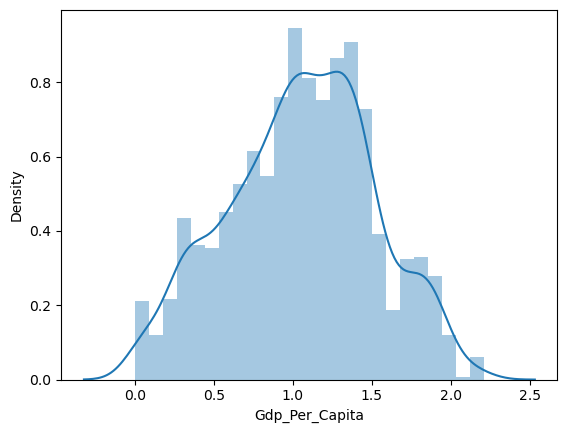

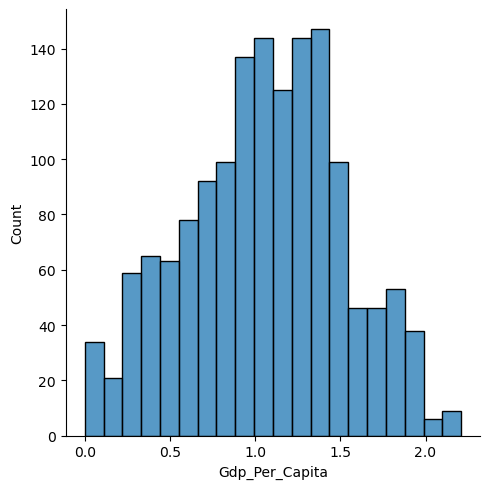

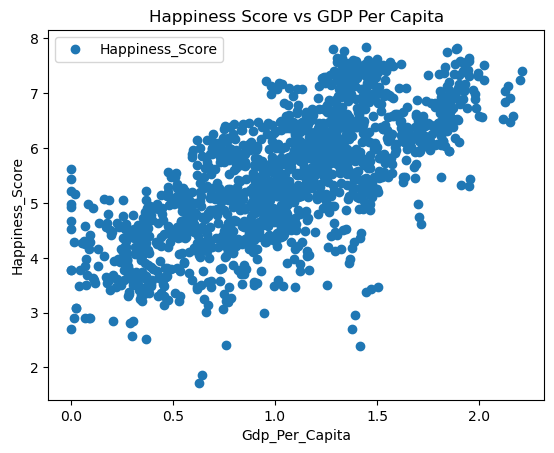

In [114]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Gdp_Per_Capita', y='Happiness_Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs GDP Per Capita')  
plt.xlabel('Gdp_Per_Capita')  
plt.ylabel('Happiness_Score')  
plt.show()

In [116]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Gdp_Per_Capita'].values.reshape(-1,1)
y = df['Happiness_Score'].values.reshape(-1,1)

In [118]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.771  ],
       [1.377  ],
       [0.628  ]])

In [120]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.186],
       [2.707],
       [1.721]])

In [122]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [125]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [127]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [129]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

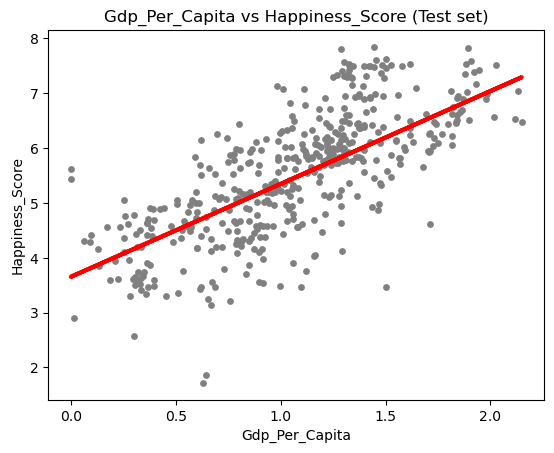

In [131]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Gdp_Per_Capita vs Happiness_Score (Test set)')
plot_test.xlabel('Gdp_Per_Capita')
plot_test.ylabel('Happiness_Score')
plot_test.show()

##### The regression line on the test set is not a perfect fit, meaning there is still considerable variance among the data points. This tells me there may be other variables at play that predict the happiness score of countries.

In [135]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [137]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.69215222]]
Mean squared error:  0.630157198824572
R2 score:  0.5178670992890653


##### The slope indeed shows a positive relationship between the two variables, but does not tell us how well the model performed. The mean squared error was rather small, at 0.63, which also indicates that the model is a good fit. The R2 score is at around 52%, which means that the fit isn't terrible but also isn't great. Overall the model is okay, but not an absolute fit. 

In [140]:
y_predicted

array([[5.39078896],
       [5.90787684],
       [4.6208597 ],
       [6.00842452],
       [5.24840451],
       [5.81675444],
       [4.21007283],
       [5.82567208],
       [5.78844473],
       [5.72075864],
       [5.10796264],
       [5.4178634 ],
       [5.39755757],
       [5.67881059],
       [5.30005576],
       [4.27468077],
       [3.87580508],
       [5.88997386],
       [4.78669062],
       [4.96944306],
       [5.39302684],
       [6.86126924],
       [6.91880241],
       [4.98467243],
       [6.72251276],
       [5.89402413],
       [5.36033022],
       [5.21747756],
       [4.9220628 ],
       [5.13019752],
       [6.55160538],
       [4.16811544],
       [4.40595637],
       [6.01519313],
       [6.01192155],
       [6.90018874],
       [5.9204326 ],
       [6.38655824],
       [4.55148146],
       [6.80373606],
       [6.69374617],
       [5.9948873 ],
       [6.13364378],
       [6.19456126],
       [4.28724603],
       [5.08789371],
       [5.69559634],
       [6.054

In [142]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.3300,5.390789
1,7.2840,5.907877
2,4.5560,4.620860
3,5.7610,6.008425
4,5.0051,5.248405
5,6.0780,5.816754
6,4.5070,4.210073
7,6.0320,5.825672
8,5.7180,5.788445
9,6.1920,5.720759


##### The values are close, but there is variability between the actual and predicted y values (Happiness scores).

In [146]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [148]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [150]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.69215222]]
Mean squared error:  0.6158660617835164
R2 score:  0.5038340509861237


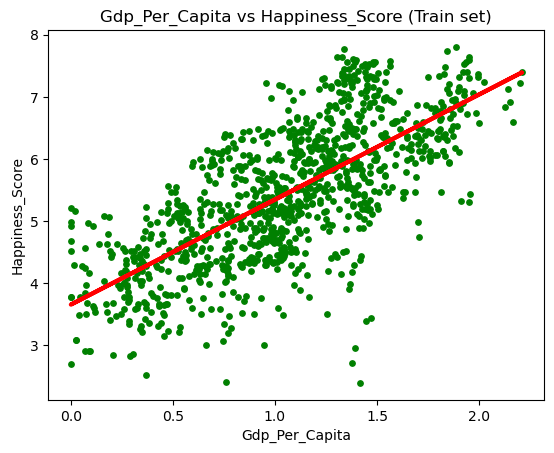

In [152]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Gdp_Per_Capita vs Happiness_Score (Train set)')
plot_test.xlabel('Gdp_Per_Capita')
plot_test.ylabel('Happiness_Score')
plot_test.show()

##### Based on the test set; slope - that tells me how the y variable changes when X changes; mean squared error - that tells me how close the regression line is to a set of points, in other words it checks for accuracy; and r2 score, a metric that tells me how well the model explains the variance in data, I think this model is a fair one. It appears that, particularly based on the r squared value of 0.52, that the fit is almost right in the middle, where it isn't poor and it isn't good. The mean squared error is relativley small, indiciating a better fit.

##### Possible data bias lies with the inherent collection of the data itself and the metrics that were incorporated from a Western perspective, including GDP as a metric for a person's happiness. We also do not know how the individuals who participated were selected and whether there were  cultural barriers in the completion of the survey.